In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn import metrics
import os


In [67]:
filename='top50.csv'
df=pd.read_csv(filename,encoding='ISO-8859-1', index_col=0)

In [68]:
df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,Señorita,Shawn Mendes,canadian pop,117.0,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105.0,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190.0,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,NaN,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150.0,65,58,-4,11,18,175,45,7,94


In [69]:
df.shape

(50, 13)

In [70]:
df.rename(columns={'Track.Name':'track_name','Artist.Name':'artist_name','Beats.Per.Minute':'beats_per_minute','Loudness..dB..':'Loudness(dB)','Valence.':'Valence','Length.':'Length', 'Acousticness..':'Acousticness','Speechiness.':'Speechiness'},inplace=True)
df.head()

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
1,Señorita,Shawn Mendes,canadian pop,117.0,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105.0,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190.0,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,NaN,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150.0,65,58,-4,11,18,175,45,7,94


In [71]:
df.isnull().sum()

track_name          0
artist_name         0
Genre               0
beats_per_minute    1
Energy              0
Danceability        0
Loudness(dB)        0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64

In [72]:
df.fillna(df.mean(), inplace=True)
df.head()

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
1,Señorita,Shawn Mendes,canadian pop,117.000000,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105.000000,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190.000000,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,120.612245,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150.000000,65,58,-4,11,18,175,45,7,94


In [73]:
genre_list=df['Genre'].values.tolist()

In [74]:
popular_artist=df.groupby('artist_name').size()
print(popular_artist)

artist_name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64


In [75]:
artist_list=df['artist_name'].values.tolist()
print(artist_list)

['Shawn Mendes', 'Anuel AA', 'Ariana Grande', 'Ed Sheeran', 'Post Malone', 'Ed Sheeran', 'Lil Tecca', 'Sam Smith', 'Lil Nas X', 'Billie Eilish', 'Bad Bunny', 'DJ Snake', 'Lewis Capaldi', 'Sech', 'Drake', 'Chris Brown', 'J Balvin', 'Post Malone', 'Y2K', 'Lizzo', 'MEDUZA', 'Lil Nas X', 'Jhay Cortez', 'Lunay', 'Billie Eilish', 'Shawn Mendes', 'Tones and I', 'Ali Gatie', 'Daddy Yankee', 'J Balvin', 'The Chainsmokers', 'Ariana Grande', 'Maluma', 'Young Thug', 'Katy Perry', 'Martin Garrix', 'Sech', 'Ed Sheeran', 'Jonas Brothers', 'Lauv', 'Kygo', 'Taylor Swift', 'Lady Gaga', 'Khalid', 'ROSALÍA', 'Marshmello', 'Nicky Jam', 'Marshmello', 'The Chainsmokers', 'Ed Sheeran']


In [76]:
df.describe()

,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.612245,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.650643,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,107.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


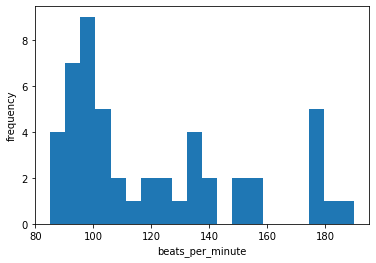

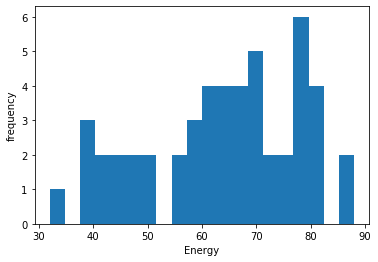

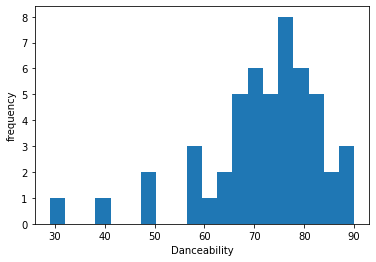

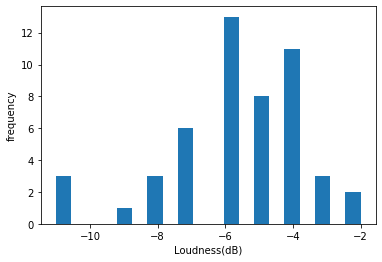

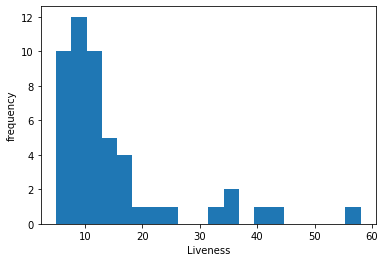

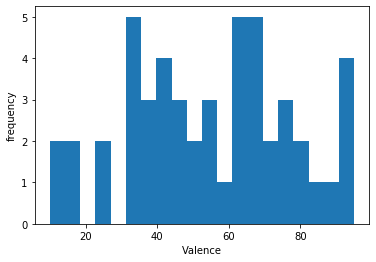

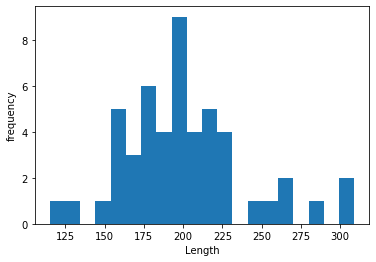

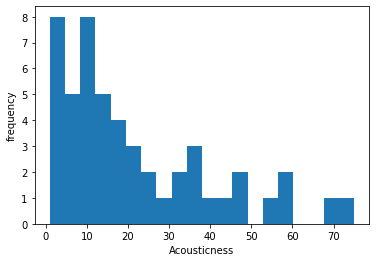

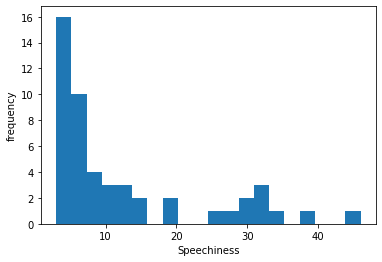

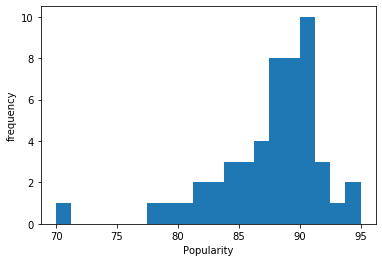

In [77]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
columns = list(newdf.columns)

for col in columns:
    plt.ylabel('frequency')
    plt.xlabel(col)
    plt.hist(newdf[col], bins=20)
    plt.show()

In [78]:
x=df.loc[:,['Energy','Danceability','Length','Loudness(dB)','Acousticness']].values
y=df.loc[:,'Popularity'].values

In [79]:
# Creating a test and training dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [82]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
#Displaying the difference between the actual and the predicted
y_pred = regressor.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       87  86.581172
1       83  85.112935
2       91  87.002276
3       90  88.180728
4       88  86.756037
5       88  88.646005
6       91  87.322822
7       88  87.137433
8       86  87.563779
9       90  87.114860
10      82  88.556438
11      91  85.367405
12      87  87.518450
13      91  86.764000
14      89  86.955842


In [84]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 2.5476687888024885
Mean Squared Error: 9.869026948267186
